In [5]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install pillow pyheif > /dev/null



In [6]:
import os
import pyheif
from PIL import Image

folder = "/content/drive/MyDrive/facial_dataset/Tanziul"

for filename in os.listdir(folder):
    if filename.lower().endswith(".heic"):
        heic_path = os.path.join(folder, filename)
        jpg_path = os.path.join(folder, filename.rsplit('.', 1)[0] + '.jpg')
        try:
            heif_file = pyheif.read(heic_path)
            image = Image.frombytes(
                heif_file.mode,
                heif_file.size,
                heif_file.data,
                "raw",
                heif_file.mode,
                heif_file.stride,
            )
            image.save(jpg_path, "JPEG")
            os.remove(heic_path)  # optional: delete original .heic file
            print(f"✅ Converted: {filename} → {os.path.basename(jpg_path)}")
        except Exception as e:
            print(f"❌ Failed to convert {filename}: {e}")


✅ Converted: IMG_6118.HEIC → IMG_6118.jpg
✅ Converted: IMG_6116.HEIC → IMG_6116.jpg
✅ Converted: IMG_6106.HEIC → IMG_6106.jpg
✅ Converted: IMG_6105.HEIC → IMG_6105.jpg
✅ Converted: IMG_6117.HEIC → IMG_6117.jpg
✅ Converted: IMG_6122.HEIC → IMG_6122.jpg
✅ Converted: IMG_6123.HEIC → IMG_6123.jpg
✅ Converted: IMG_6103.HEIC → IMG_6103.jpg
✅ Converted: IMG_6108.HEIC → IMG_6108.jpg
✅ Converted: IMG_6121.HEIC → IMG_6121.jpg
✅ Converted: IMG_6112.HEIC → IMG_6112.jpg
✅ Converted: IMG_6098.HEIC → IMG_6098.jpg
✅ Converted: IMG_6115.HEIC → IMG_6115.jpg
✅ Converted: IMG_6104.HEIC → IMG_6104.jpg
✅ Converted: IMG_6132.HEIC → IMG_6132.jpg
✅ Converted: IMG_6124.HEIC → IMG_6124.jpg
✅ Converted: IMG_6114.HEIC → IMG_6114.jpg
✅ Converted: IMG_6119.HEIC → IMG_6119.jpg
✅ Converted: IMG_6137.HEIC → IMG_6137.jpg
✅ Converted: IMG_6128.HEIC → IMG_6128.jpg
✅ Converted: IMG_6126.HEIC → IMG_6126.jpg
✅ Converted: IMG_6134.HEIC → IMG_6134.jpg
✅ Converted: IMG_6129.HEIC → IMG_6129.jpg
✅ Converted: IMG_6113.HEIC → IMG_6

In [6]:
# Face Recognition Attendance System using MobileNetV2 in Google Colab

# STEP 1: Import Libraries
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input

In [7]:
path = '/content/drive/MyDrive/facial_dataset'
folder_name = []
folder_paths  =[]
for root, folder, files in os.walk(path):
    folder_name.extend(folder)
    full_paths = [path+'/'+ f for f in folder]
    folder_paths.extend(full_paths)
print(folder_name)
print(folder_paths)



['Sameer', 'Prithoy', 'Tanziul', 'Niloy']
['/content/drive/MyDrive/facial_dataset/Sameer', '/content/drive/MyDrive/facial_dataset/Prithoy', '/content/drive/MyDrive/facial_dataset/Tanziul', '/content/drive/MyDrive/facial_dataset/Niloy']


In [8]:
folder_path=[]
for i in folder_paths:
    folder_path.append(i+'/')
folder_path

['/content/drive/MyDrive/facial_dataset/Sameer/',
 '/content/drive/MyDrive/facial_dataset/Prithoy/',
 '/content/drive/MyDrive/facial_dataset/Tanziul/',
 '/content/drive/MyDrive/facial_dataset/Niloy/']

In [11]:
persons = [[] for _ in folder_path]
for i in range(len(folder_path)):
    for _, _, file_name in os.walk(folder_path[i]):
        persons[i].extend(file_name)

In [12]:
person_1=[]
person_2=[]
person_3=[]
person_4=[]
for i in range(len(persons)):
    for j in range(len(persons[i])):
        if(i == 0):
            person = persons[i][j]
            label = folder_name[i]
            classification=0
            person_1.append([person, label,classification])
        elif(i == 1):
            person = persons[i][j]
            label = folder_name[i]
            classification=1
            person_2.append([person, label, classification])
        elif(i == 2):
            person = persons[i][j]
            label = folder_name[i]
            classification=2
            person_3.append([person, label, classification])
        elif(i == 3):
            person = persons[i][j]
            label = folder_name[i]
            classification=3
            person_4.append([person, label, classification])

In [14]:
full_data = []
for i in range(4):
    if i == 0:
        for i in range(len(person_1)):
            full_data.append(person_1[i])
    elif i == 1:
        for i in range(len(person_2)):
            full_data.append(person_2[i])
    elif i == 2:
        for i in range(len(person_3)):
            full_data.append(person_3[i])
    elif i == 3:
        for i in range(len(person_4)):
            full_data.append(person_4[i])
print(len(person_1), len(person_2), len(person_3), len(person_4))
random.shuffle(full_data)
len(full_data)

232 136 203 174


745

(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)


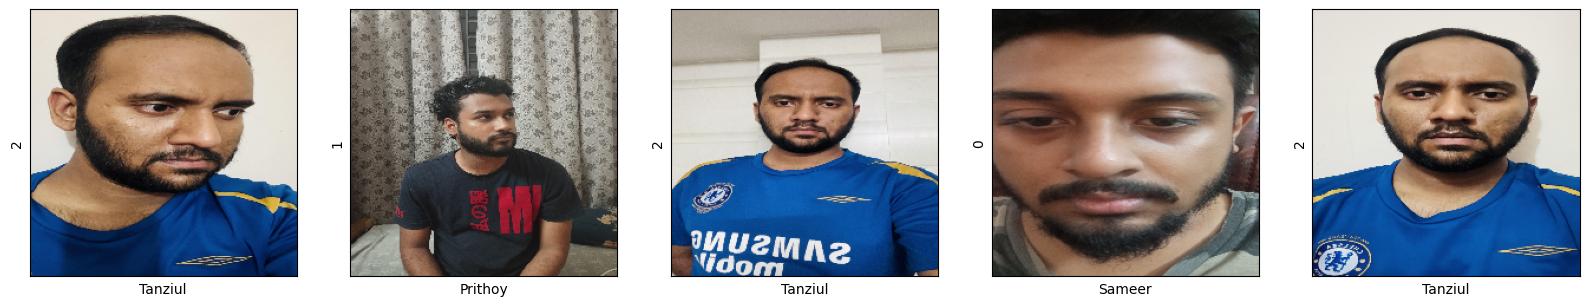

In [31]:
plt.figure(figsize=(20,10))
c=0
for i in range(5):
    plt.subplot(1,5,c+1)
    if(full_data[i][2] == 0):
        img_path = os.path.join(folder_path[0], full_data[i][0])
    elif(full_data[i][2]==1):
        img_path = os.path.join(folder_path[1], full_data[i][0])
    elif(full_data[i][2]==2):
        img_path = os.path.join(folder_path[2], full_data[i][0])
    elif(full_data[i][2]==3):
        img_path = os.path.join(folder_path[3], full_data[i][0])

    image = cv2.imread(img_path)
    image = cv2.resize(image, (227,227))
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(full_data[i][1])
    plt.ylabel(full_data[i][2])
    c+=1

In [16]:
len(full_data)

745

In [17]:
test_size = round((len(full_data)*.15))

test_data = random.sample(full_data, test_size)

train_data = [data for data in full_data if data not in test_data]

print(f"Test Data ({test_size} samples): {test_data}")
print(f"Train Data ({len(train_data)} samples): {train_data}")

Test Data (112 samples): [['IMG_20250624_125753.jpg', 'Sameer', 0], ['IMG_20250624_125930.jpg', 'Sameer', 0], ['IMG_6084.jpg', 'Tanziul', 2], ['IMG_20250615_231956_97.jpg', 'Niloy', 3], ['IMG_20250615_231956_45.jpg', 'Niloy', 3], ['IMG_20250624_125717_1.jpg', 'Sameer', 0], ['IMG_20250624_170329_TIMEBURST59.jpg', 'Niloy', 3], ['IMG_6034.jpg', 'Tanziul', 2], ['IMG_20250615_233742_32.jpg', 'Prithoy', 1], ['IMG_6044.jpg', 'Tanziul', 2], ['IMG_20250615_231956_65.jpg', 'Niloy', 3], ['IMG_20250615_231956_135.jpg', 'Niloy', 3], ['IMG_20250624_170329_TIMEBURST56.jpg', 'Niloy', 3], ['IMG_20250615_233742_157.jpg', 'Prithoy', 1], ['IMG_20250615_231956_113.jpg', 'Niloy', 3], ['IMG_20250624_130011.jpg', 'Sameer', 0], ['IMG_20250615_231956_133.jpg', 'Niloy', 3], ['IMG_20250624_125756.jpg', 'Sameer', 0], ['IMG_20250624_170329_TIMEBURST75.jpg', 'Niloy', 3], ['IMG_6126.jpg', 'Tanziul', 2], ['IMG_6120.jpg', 'Tanziul', 2], ['IMG_20250615_231956_58.jpg', 'Niloy', 3], ['IMG_20250624_170329_57.jpg', 'Niloy',

In [23]:
image_shape=(227,227)

In [19]:
X_train = []
Y_train=[]
for data in train_data:
    label = data[2]
    Y_train.append(label)
    if label == 0:
        img_path = os.path.join(folder_path[0], data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1], data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2], data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3], data[0])
    else:
        continue
    image = cv2.imread(img_path)
    image = cv2.resize(image,image_shape)
    if image is not None:
        X_train.append(image)

X_train = np.array(X_train)
Y_train=np.array(Y_train)
Y_train = np.reshape(Y_train, (-1, 1))
print(f"Shape of X is : {X_train.shape}")
print(f"Shape of Y is : {Y_train.shape}")

Shape of X is : (633, 227, 227, 3)
Shape of Y is : (633, 1)


In [24]:
X_test =[]
Y_test=[]
for data in test_data:
    label = data[2]
    if label == 0:
        img_path = os.path.join(folder_path[0],data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1],data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2],data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3],data[0])
    image = cv2.imread(img_path)
    image = cv2.resize(image, image_shape)
    X_test.append(image)
    Y_test.append(label)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))
print(f"Shape of X is : {X_test.shape}")
print(f"Shape of Y is : {Y_test.shape}")

Shape of X is : (112, 227, 227, 3)
Shape of Y is : (112, 1)


In [32]:
print(f"Shape of Train data : {X_train.shape} and label : {Y_train.shape}")
print(f"Shape of Test data : {X_test.shape} and label : {Y_test.shape}")

Shape of Train data : (633, 227, 227, 3) and label : (633, 1)
Shape of Test data : (112, 227, 227, 3) and label : (112, 1)


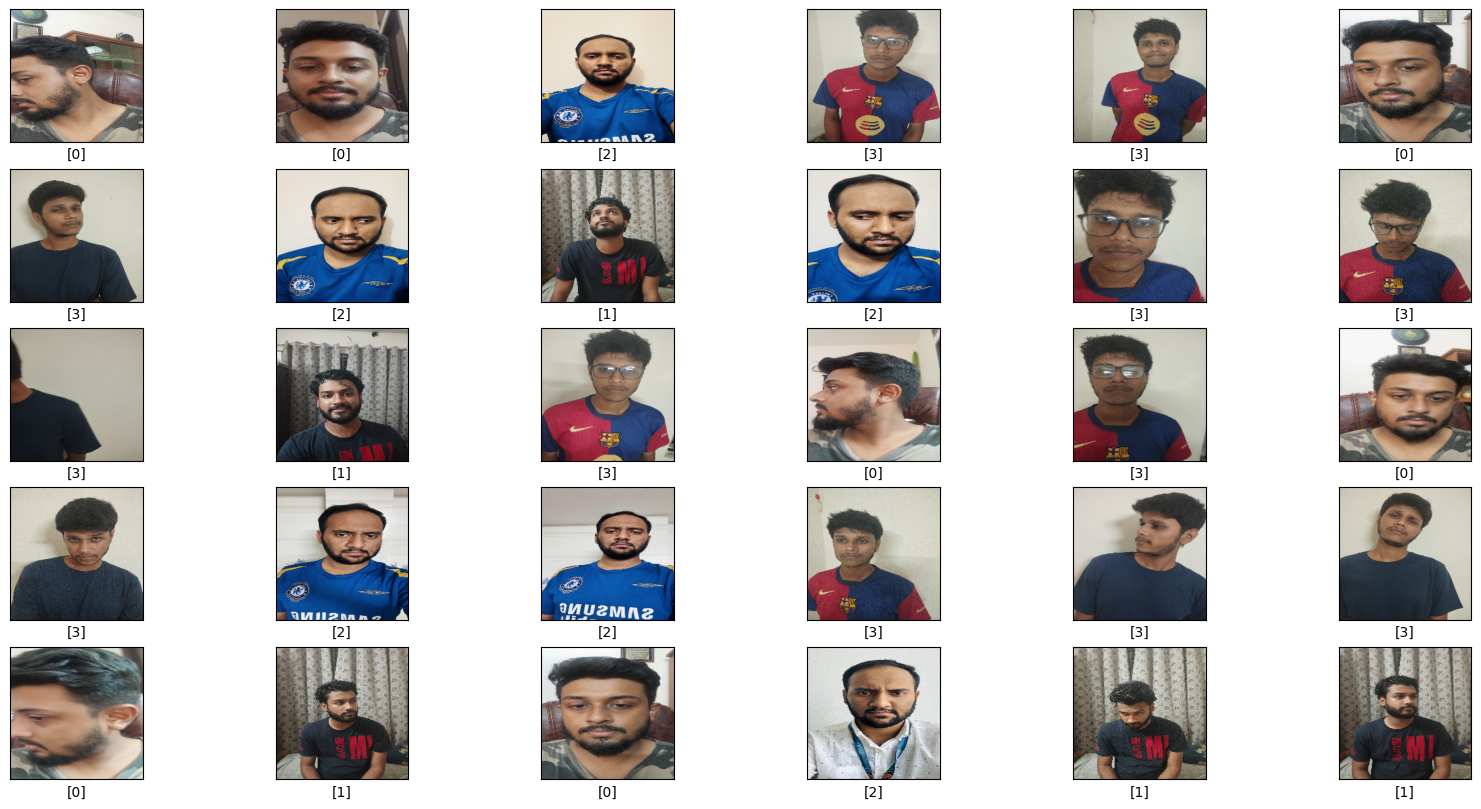

In [33]:
i = 0
plt.figure(figsize=(20,10))
for img in range(30):
    plt.subplot(5, 6, i+1)
    image = cv2.cvtColor(X_test[img],cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(Y_test[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

In [25]:
# Normalize and mean images
train_mean = np.mean(X_train, axis=0)
test_mean = np.mean(X_test, axis=0)
X_train_norm = X_train - train_mean
X_test_norm = X_test - test_mean

# Define MobileNetV2-based model
input_shape = X_train.shape[1:]
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/tmp/ipython-input-25-50104883.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 227, 227,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 114, 114,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 114, 114,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 114, 114,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 114, 114,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 114, 114,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 114, 114,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 114, 114,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 114, 114,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 114, 114,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 114, 114,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 114, 114,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 115, 115,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 57, 57,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 57, 57,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 57, 57,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 57, 57,    │      2,304 │ block_1_depthwis

 Total params: 4,096,580 (15.63 MB)

 Trainable params: 1,838,596 (7.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [26]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_split=0.2, batch_size=16, callbacks=[early_stop])


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 227, 227, 3))
  warnings.warn(msg)


32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 585ms/step - accuracy: 0.5756 - loss: 2.7712 - val_accuracy: 0.9764 - val_loss: 1.3733
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9636 - loss: 1.3895 - val_accuracy: 0.9921 - val_loss: 1.1676
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9888 - loss: 1.1463 - val_accuracy: 1.0000 - val_loss: 1.0297
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9786 - loss: 1.0538 - val_accuracy: 0.9528 - val_loss: 1.0264
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9695 - loss: 1.0323 - val_accuracy: 1.0000 - val_loss: 0.8609
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.8440 - val_accuracy: 1.0000 - val_loss: 0.7860
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9988 - loss: 0.7731 - val_accuracy: 1.0000 - val_loss: 0.7224
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9991 - loss: 0.7110 - val_accuracy: 1.0000 - val_loss:

In [34]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [36]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 21)

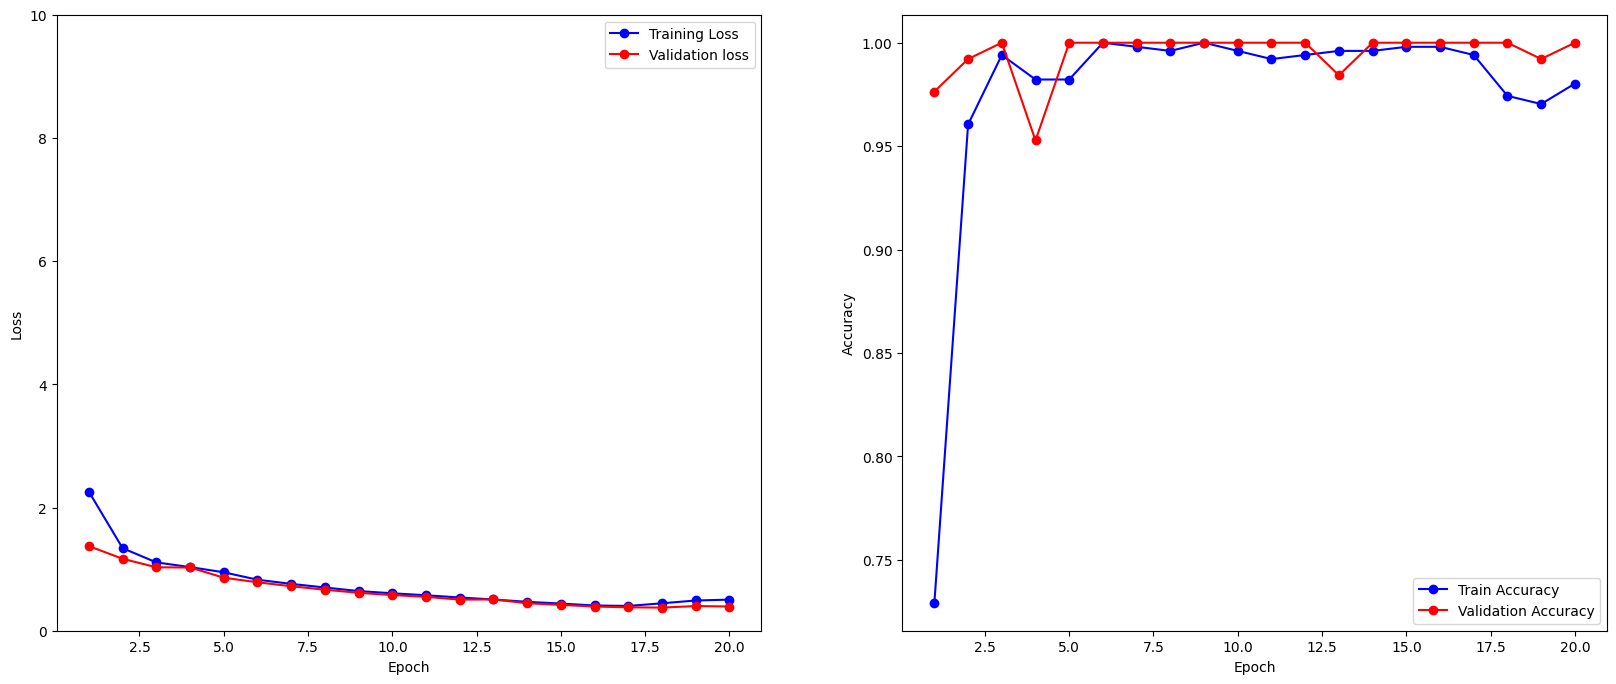

In [37]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9850 - loss: 0.3991

Test Accuracy: 0.9910714030265808

Test Loss: 0.39006879925727844
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


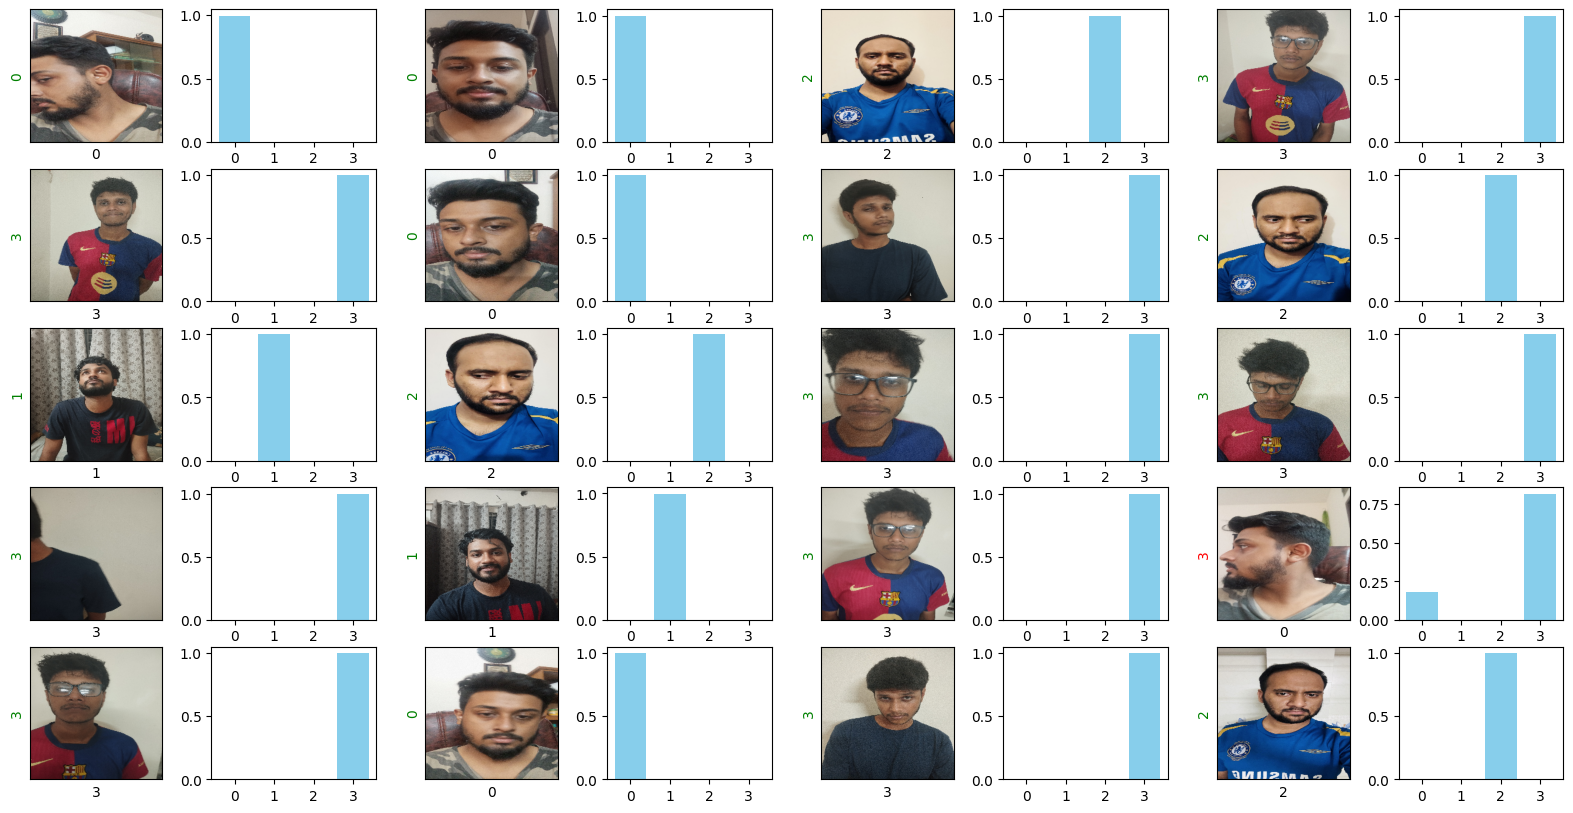

In [28]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

# Prediction and visualization
probability = model.predict(X_test_norm)

c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(min(20, len(X_test))):
    plt.subplot(5,8,c+1)
    img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xlabel(Y_test[i][0])
    if(Y_test[i][0] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()

# Save the model
model.save("/content/drive/MyDrive/model_MobileNet5.h5")
